# Imports

In [2]:
import warnings
import numpy as np
import pandas as pd
from scipy.io import arff
import scipy as sp
import os
import struct
import skdim
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
import repliclust
import sklearn.neighbors as sknn
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn import preprocessing
from sklearn.model_selection import train_test_split               
import json
from PIL import Image
from kisomap import KIsomap
from matplotlib.pyplot import cm
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE, Isomap, SpectralEmbedding, LocallyLinearEmbedding
import umap.umap_ as umap
from sklearn.datasets import fetch_olivetti_faces


# To avoid unnecessary warning messages
warnings.simplefilter(action='ignore')

# Função para comparar os métodos e plotar numa única figura
def compare_and_plot_surface_reduction(X,color,dataset_name):

    k = int(np.floor(np.sqrt(X.shape[0])))

    methods = {
        'Isomap': Isomap(n_components=2, n_neighbors=k),
        'UMAP': umap.UMAP(n_components=2, n_neighbors=k),
        'KPCA': KernelPCA(n_components=2, kernel='rbf'),
        'LLE': LocallyLinearEmbedding(n_components=2, n_neighbors=k),
        'Laplacian Eigenmaps': SpectralEmbedding(n_components=2, n_neighbors=k),
        't-SNE': TSNE(n_components=2),
        'KISOMAP': KIsomap
    }

    fig = plt.figure(figsize=(18, 3))  # Figura maior para múltiplas subplots
    #color = [cm.rainbow(valor) for valor in np.linspace(0,1,X.shape[0])]
    # Plotando a superfície original em R^3
    ax = fig.add_subplot(1, 8, 1, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, marker='o')
    ax.set_title(dataset_name)
    ax.grid(False)
    ax.axis(False)

    

    # Aplicar cada método e plotar a projeção em 2D
    for idx, (name, model) in enumerate(methods.items(), start=2):
        print(name)
        if name == 'KISOMAP':
            X_transformed, _ = model(X,k,2,0)
            ax = fig.add_subplot(1, 8, idx)
            ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=color, marker='o')
            ax.set_title(f'{name}')
            ax.grid(False)
            ax.axis(False)
        else:
            X_transformed = model.fit_transform(X)
            ax = fig.add_subplot(1, 8, idx)
            ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=color, marker='o')
            ax.set_title(f'{name}')
            ax.grid(False)
            ax.axis(False)
        
    plt.show()

Failed to initialize OpenAI client. Either put OPENAI_API_KEY=<...> into the .env file or pass openai_api_key=<...> as an argument in a function call.


# S-Surface

In [2]:
file_results = r'C:\Users\Gustavo\Documents\Mestrado\curvature-based-isomap\datasets\s-surface\S_Surface.json'
with open(file_results, 'r') as f:
    results = json.load(f)

results = np.array(results)

Isomap
UMAP
KPCA
LLE
Laplacian Eigenmaps
t-SNE
KISOMAP


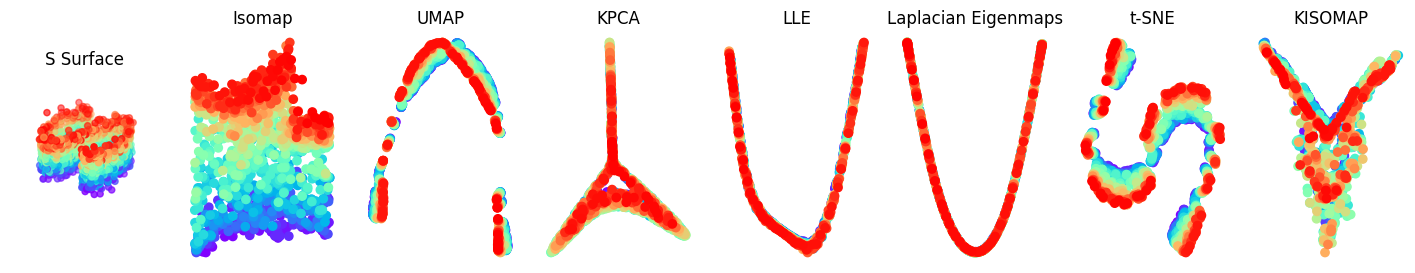

In [30]:
color = [cm.rainbow(valor) for valor in np.linspace(0,1,results.shape[0])]

compare_and_plot_surface_reduction(results,color,'S Surface')

# Gaussian Dataset

Data saved to repliclust_data.csv


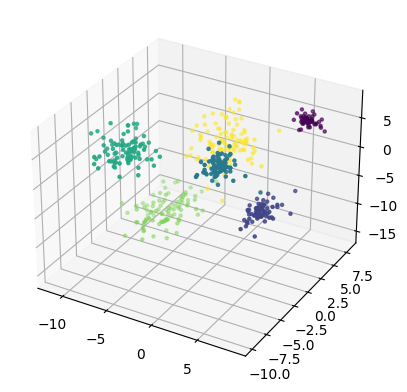

In [19]:
# Gaussian Dataset
archetype = repliclust.Archetype(
                    dim=3,
                    n_samples=500,
                    max_overlap=0.00001, min_overlap=0.000004 ,name="oblong"
                    )
X1, y1, _ = (repliclust.DataGenerator(archetype).synthesize(quiet=True))

X1 = X1.astype(np.float64)

# Parameters
noise_scale = 1  # adjust the noise gaussian parameter here

# Add noise
# Definir a magnitude do ruído gaussiano
magnitude = np.linspace(0,1,26)
# Gerar ruído gaussiano com média zero e desvio padrão baseado na magnitude
ruido = np.random.normal(0, scale=magnitude[0], size=X1.shape)
# Adicionar o ruído aos dados
# Surface equation
X1.T[0] = X1.T[0] + ruido.T[0]
X1.T[1] = X1.T[1] + ruido.T[1]
X1.T[2] = X1.T[2] + ruido.T[2]

# Create DataFrame with x, y, z and label
df = pd.DataFrame({
    'x': X1[:, 0],  # First column of X1
    'y': X1[:, 1],  # Second column of X1
    'z': X1[:, 2],  # Third column of X1
    'label': y1     # Label data
})

# Save DataFrame to CSV
#df.to_csv('repliclust_data.csv', index=False)

print("Data saved to repliclust_data.csv")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.scatter(X1.T[0], X1.T[1], X1.T[2], c=y1, marker='.')

Isomap
UMAP
KPCA
LLE
Laplacian Eigenmaps
t-SNE
KISOMAP


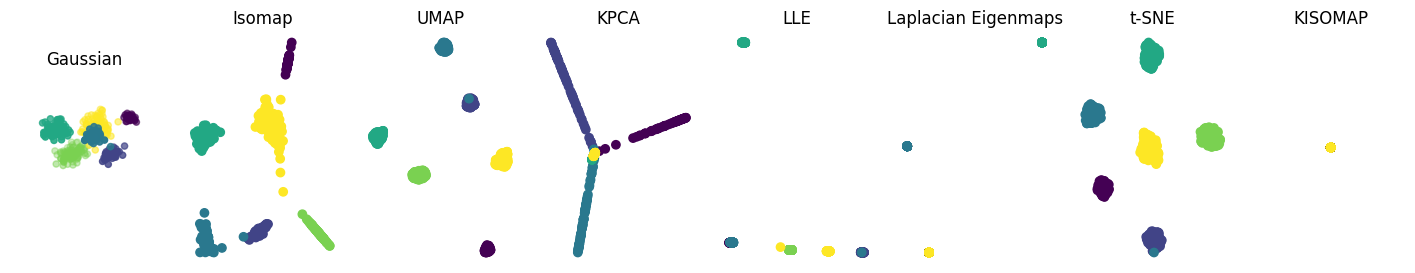

In [31]:
# Comparar e plotar os métodos de redução de dimensionalidade
compare_and_plot_surface_reduction(X1,y1,'Gaussian')


# Pen Digits 

In [2]:
# Reading .tra file
train_data = pd.read_csv('C:/Users/Gustavo/Documents/Mestrado/curvature-based-isomap/datasets/pen-digits/pendigits.tra',header=None)  # Add parameters as needed

# Reading .tes file
test_data = pd.read_csv('C:/Users/Gustavo/Documents/Mestrado/curvature-based-isomap/datasets/pen-digits/pendigits.tes',header=None)  # Add parameters as needed

In [3]:
# Separando dados e rótulos no conjunto de treino
X_train = train_data.iloc[:, :-1]  # Todas as colunas exceto a última
y_train = train_data.iloc[:, -1]   # Apenas a última coluna

# Separando dados e rótulos no conjunto de teste
X_test = test_data.iloc[:, :-1]    # Todas as colunas exceto a última
y_test = test_data.iloc[:, -1]     # Apenas a última coluna

In [4]:
pen_digits = {'data': X_train, 'target': y_train, 'details': {'name':'Pen-Digits'}}

# Mnist

In [5]:
def read_idx1_ubyte(file_path):
    with open(file_path, 'rb') as file:
        magic_number = struct.unpack('>I', file.read(4))[0]
        if magic_number != 2049:
            raise ValueError(f"Invalid magic number {magic_number} in file {file_path}")
        num_items = struct.unpack('>I', file.read(4))[0]
        labels = np.frombuffer(file.read(), dtype=np.uint8)
        if labels.size != num_items:
            raise ValueError("Mismatch in label count")
        return labels

def read_idx3_ubyte(file_path):
    with open(file_path, 'rb') as file:
        magic_number = struct.unpack('>I', file.read(4))[0]
        if magic_number != 2051:
            raise ValueError(f"Invalid magic number {magic_number} in file {file_path}")
        
        num_images = struct.unpack('>I', file.read(4))[0]
        num_rows = struct.unpack('>I', file.read(4))[0]
        num_cols = struct.unpack('>I', file.read(4))[0]
        
        images = np.frombuffer(file.read(), dtype=np.uint8).reshape(num_images, num_rows * num_cols)
        return images

labels_path = r'C:\Users\Gustavo\Documents\Mestrado\curvature-based-isomap\datasets\mnist\train-labels.idx1-ubyte'
images_path = r'C:\Users\Gustavo\Documents\Mestrado\curvature-based-isomap\datasets\mnist\train-images.idx3-ubyte'  # Substitua pelo caminho do seu arquivo

labels = read_idx1_ubyte(labels_path)
images = read_idx3_ubyte(images_path)

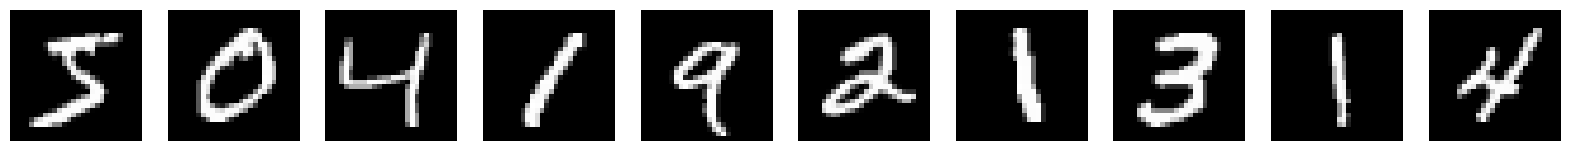

In [5]:
plt.figure(figsize=[20, 5])

# Plot the first 10 images
for i in range(10):
    image_row = images[i]
    image_reshaped = image_row.reshape(28, 28)
    
    plt.subplot(1, 10, i+1)  # Create a grid to plot 5 images side by side
    plt.imshow(image_reshaped, cmap='gray')
    plt.axis('off')  # Hide axes

plt.show()

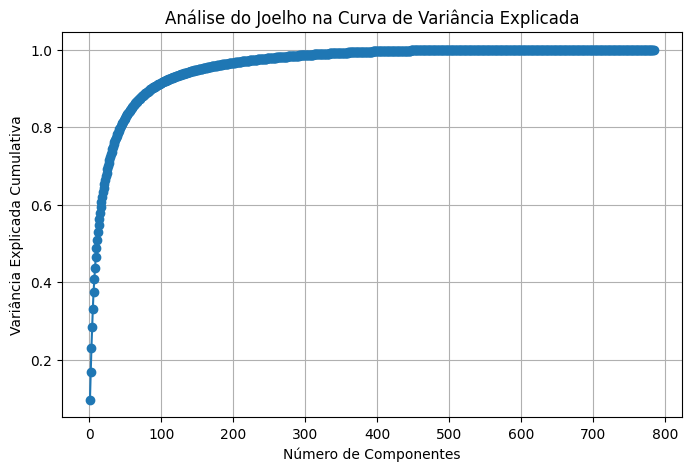

In [37]:
X = images

# Aplicar PCA
pca = PCA()
pca.fit(X)

# Variância explicada acumulada
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotar a curva de variância explicada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.title('Análise do Joelho na Curva de Variância Explicada')
plt.grid()
plt.show()


In [6]:
mnist = {'data': images, 'target': labels, 'details': {'name':'MNIST'}}

# F-mnist

In [2]:
# Reading .tra file
train_data = pd.read_csv(r'C:\Users\Gustavo\Documents\Mestrado\curvature-based-isomap\datasets\f-mnist\fashion-mnist_train.csv')  # Add parameters as needed

# Reading .tes file
test_data = pd.read_csv(r'C:\Users\Gustavo\Documents\Mestrado\curvature-based-isomap\datasets\f-mnist\fashion-mnist_test.csv')  # Add parameters as needed

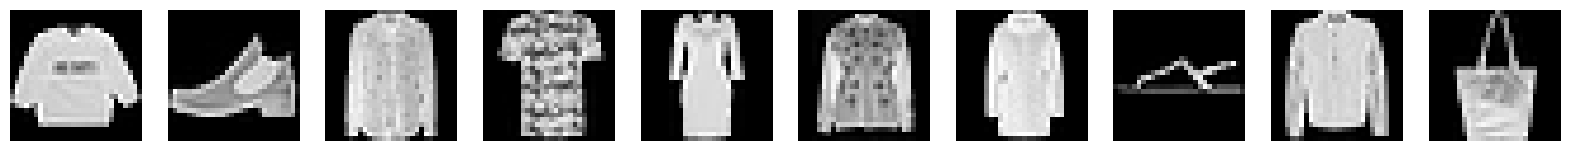

In [10]:
plt.figure(figsize=[20, 5])

# Plot the first 10 images
for i in range(10):
    image_row = np.array(train_data.drop(columns=['label']))[i]
    image_reshaped = image_row.reshape(28, 28)
    
    plt.subplot(1, 10, i+1)  
    plt.imshow(image_reshaped, cmap='gray')
    plt.axis('off')  # Hide axes

plt.show()

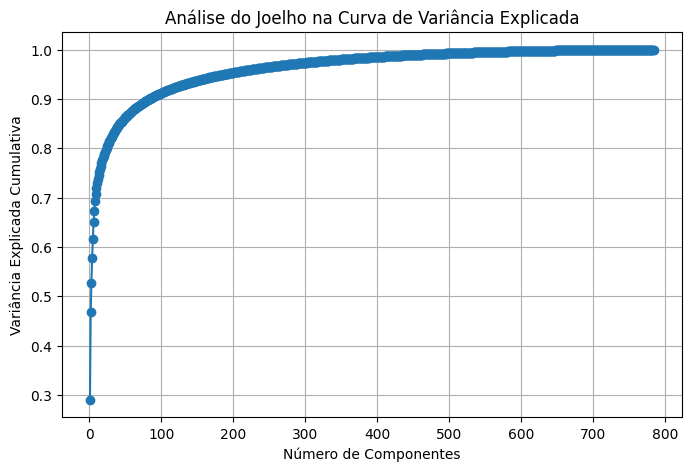

In [46]:
X = train_data.iloc[:,1:].values

# Aplicar PCA
pca = PCA()
pca.fit(X)

# Variância explicada acumulada
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotar a curva de variância explicada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.title('Análise do Joelho na Curva de Variância Explicada')
plt.grid()
plt.show()


In [3]:
fmnist = {'data': train_data.iloc[:,1:].values, 'target': train_data['label'].values, 'details': {'name':'F-MNIST'}}

# Coil-20

In [10]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for class_num in range(1, 21):  # Pastas numeradas de 1 a 20
        class_folder = os.path.join(folder, str(class_num))
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                if filename.endswith(".png"):
                    img_path = os.path.join(class_folder, filename)
                    img = Image.open(img_path).convert('L')  # Converter para escala de cinza
                    img_array = np.array(img).flatten()  # Flatten a imagem
                    images.append(img_array)
                    labels.append(class_num)
    return np.array(images), np.array(labels)

def create_dataframe(images, labels):
    data = np.column_stack((images, labels))
    columns = [f'pixel_{i}' for i in range(images.shape[1])] + ['label']
    df = pd.DataFrame(data, columns=columns)
    return df

folder_path = r'C:\Users\Gustavo\Documents\Mestrado\curvature-based-isomap\datasets\coil-20' 
images, labels = load_images_from_folder(folder_path)
dataset_df = create_dataframe(images, labels)

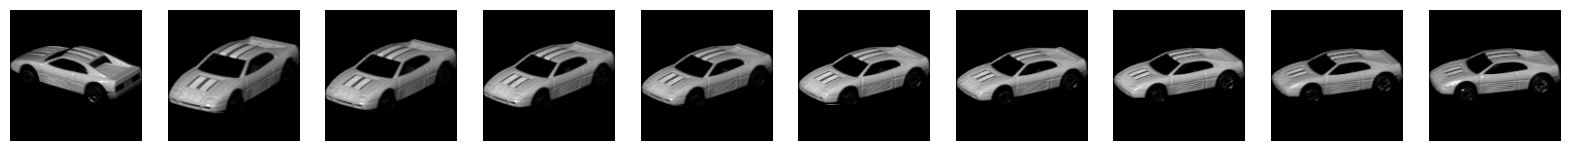

In [49]:
plt.figure(figsize=[20, 5])  # Aumente o tamanho da largura para 20 e altura para 5

for i in range(10):  # Mudando para 10 imagens em vez de 20
    image_row = images[i+200]
    image_reshaped = image_row.reshape(128, 128)
    
    plt.subplot(1, 10, i+1)  # Criar grid para 10 imagens lado a lado
    plt.imshow(image_reshaped, cmap='gray')
    plt.axis('off')  # Esconder os eixos

plt.show()

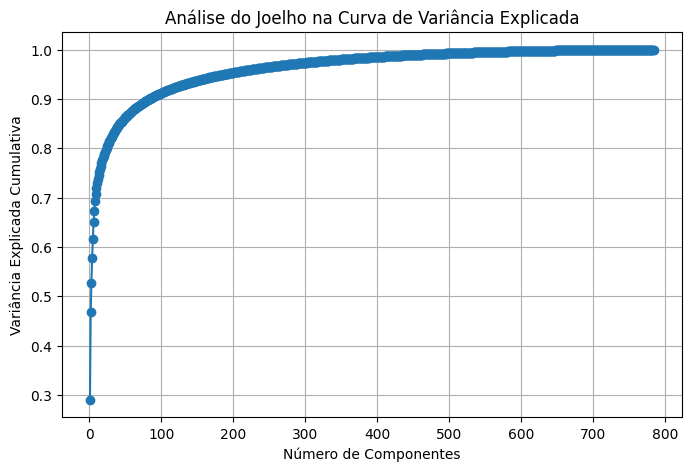

In [50]:
X = train_data.iloc[:,1:]

# Aplicar PCA
pca = PCA()
pca.fit(X)

# Variância explicada acumulada
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotar a curva de variância explicada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.title('Análise do Joelho na Curva de Variância Explicada')
plt.grid()
plt.show()

In [11]:
coil_20 = {'data': dataset_df.iloc[:, :-1].values, 'target': dataset_df.iloc[:, -1].values, 'details': {'name':'coil-20'}}

# AP_Omentum_Kidney

In [11]:
# Carregar o arquivo ARFF
data, meta = arff.loadarff(r'C:\Users\Gustavo\Documents\Mestrado\curvature-based-isomap\datasets\AP_Omentum_Kidney\AP_Omentum_Kidney.arff')

# Converter para um DataFrame do pandas
df = pd.DataFrame(data)

In [12]:
labels = df['Tissue']

dataset = df.drop(['Tissue'],axis=1)

In [13]:
omentum_kidney = {'data': dataset, 'target': labels, 'details': {'name':'AP_Omentum_Kidney'}}

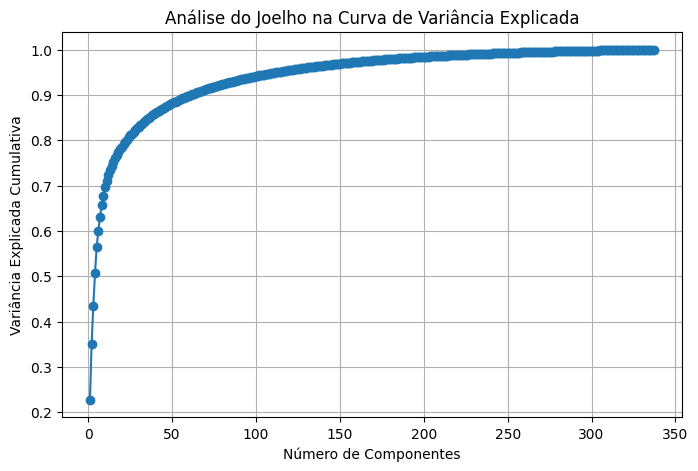

In [55]:
X = dataset

# Aplicar PCA
pca = PCA()
pca.fit(X)

# Variância explicada acumulada
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotar a curva de variância explicada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.title('Análise do Joelho na Curva de Variância Explicada')
plt.grid()
plt.show()

# Olivetti-Faces

In [14]:
olivetti_faces = fetch_olivetti_faces()
olivetti_faces.data.shape

(400, 4096)

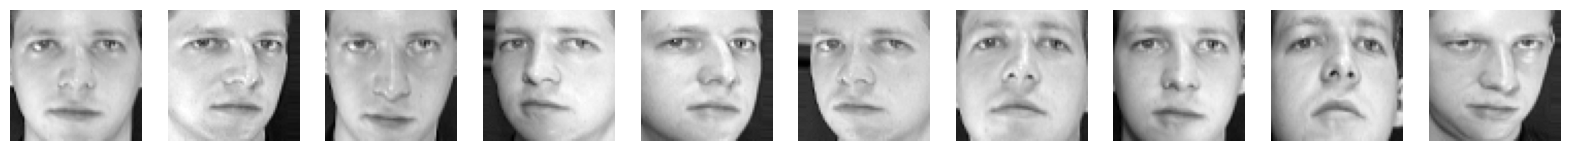

In [58]:
plt.figure(figsize=[20, 5])  # Aumente o tamanho da largura para 20 e altura para 5

for i in range(10):  # Mudando para 10 imagens em vez de 20
    image_row = olivetti_faces.data[i]
    image_reshaped = image_row.reshape(64, 64)
    
    plt.subplot(1, 10, i+1)  # Criar grid para 10 imagens lado a lado
    plt.imshow(image_reshaped, cmap='gray')
    plt.axis('off')  # Esconder os eixos

plt.show()

In [15]:
olivetti = {'data': olivetti_faces.data, 'target': olivetti_faces.target, 'details': {'name':'olivetti-faces'}}

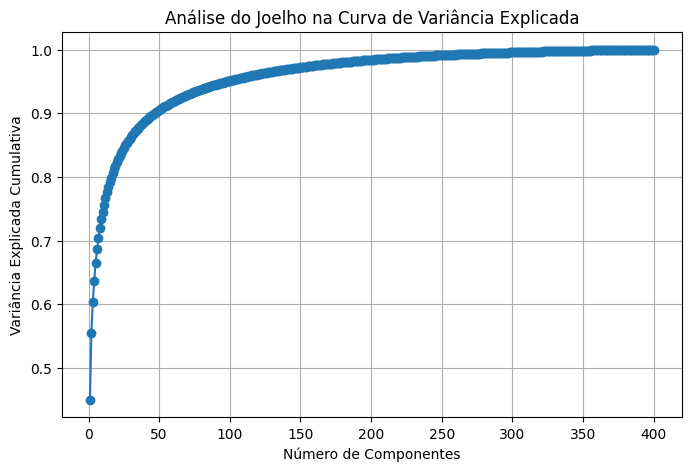

In [60]:
# Supondo que seu DataFrame seja chamado 'data'
# Certifique-se de substituir 'data' pelo nome real do seu DataFrame
X = olivetti_faces['data'].T

# Aplicar PCA
pca = PCA()
pca.fit(X)

# Variância explicada acumulada
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotar a curva de variância explicada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.title('Análise do Joelho na Curva de Variância Explicada')
plt.grid()
plt.show()

# 3D Cube

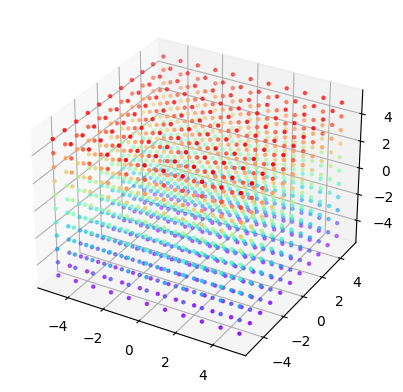

In [61]:
from matplotlib.pyplot import cm

# Criando uma grade tridimensional
x = np.linspace(-5, 5, 11)  # 11 pontos de -5 a 5
y = np.linspace(-5, 5, 11)
z = np.linspace(-5, 5, 11)
X, Y, Z = np.meshgrid(x, y, z)

# Remodelando para obter um array 3D
X3 = np.array([X.flatten(), Y.flatten(), Z.flatten()]).T

X3 = X3.astype(np.float64)

# Parameters
noise_scale = 1  # adjust the noise gaussian parameter here

# Add noise
# Definir a magnitude do ruído gaussiano
magnitude = np.linspace(0,1,11)
# Gerar ruído gaussiano com média zero e desvio padrão baseado na magnitude
ruido = np.random.normal(0, scale=magnitude[0], size=X3.shape)
# Adicionar o ruído aos dados
# Surface equation
X3.T[0] = X3.T[0] + ruido.T[0]
X3.T[1] = X3.T[1] + ruido.T[1]
X3.T[2] = X3.T[2] + ruido.T[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.scatter(X3.T[0], X3.T[1], X3.T[2], c=[cm.rainbow(valor) for valor in X3.T[2]/10+0.5], marker='.')

plt.show()

Isomap
UMAP
KPCA
LLE
Laplacian Eigenmaps
t-SNE
KISOMAP


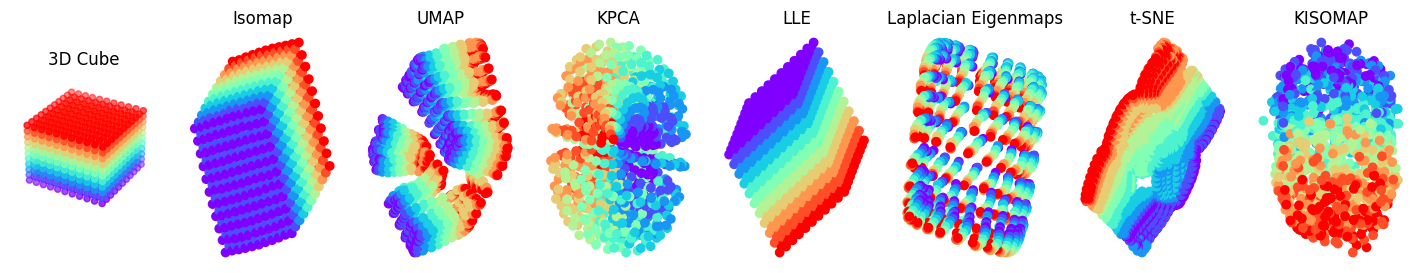

In [62]:
color = [cm.rainbow(valor) for valor in X3.T[2]/10+0.5]

compare_and_plot_surface_reduction(X3,color,'3D Cube')

# Sphere Bowl

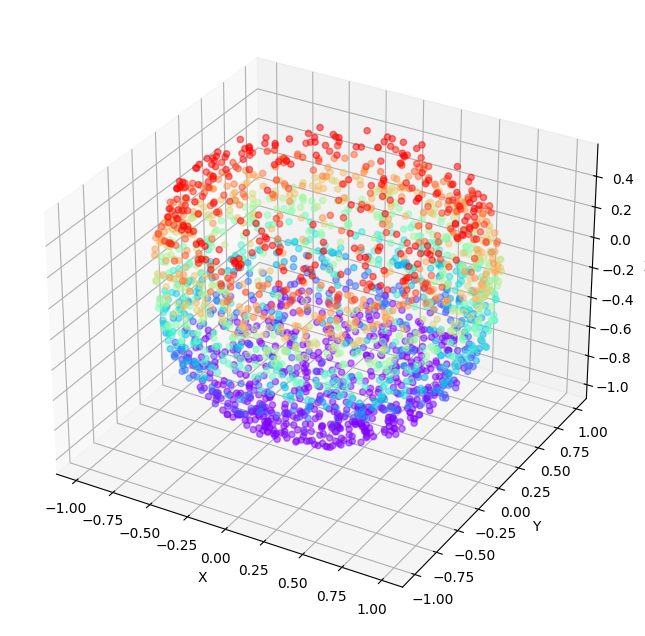

In [63]:
# Criando os parâmetros da esfera
num_pontos = 3000  # Número de pontos para gerar
raio = 5


# Gerando variáveis aleatórias normais para as três dimensões
u = np.random.normal(0, 1, num_pontos)
v = np.random.normal(0, 1, num_pontos)
w = np.random.normal(0, 1, num_pontos)

# Gerando a variável exponencial
e = np.random.exponential(0.5, num_pontos)

# Calculando o denominador para a normalização
denom = np.sqrt(u**2 + v**2 + w**2 + e)

# Normalizando as coordenadas para obter pontos na superfície da esfera
x = u / denom
y = v / denom
z = w / denom

# Adiciona ruído gaussiano (se desejado)
#magnitude = 0.00  # Ajuste da magnitude do ruído
#x += np.random.normal(0, magnitude, size=x.shape)
#y += np.random.normal(0, magnitude, size=y.shape)
#z += np.random.normal(0, magnitude, size=z.shape)

# Plotar os pontos em 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = np.array([x,y,z]).T
X = X[X[:, 2] < 0.5]

ax.scatter(X.T[0], X.T[1], X.T[2], c=[cm.rainbow(valor) for valor in X.T[2]+0.6], marker='o', alpha=0.5)

# Definir limites dos eixos
#ax.set_xlim([-raio, raio])
#ax.set_ylim([-raio, raio])
#ax.set_zlim([-raio, raio])

# Nomear os eixos
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Exibir o gráfico
plt.show()

Isomap
UMAP
KPCA
LLE
Laplacian Eigenmaps
t-SNE
KISOMAP


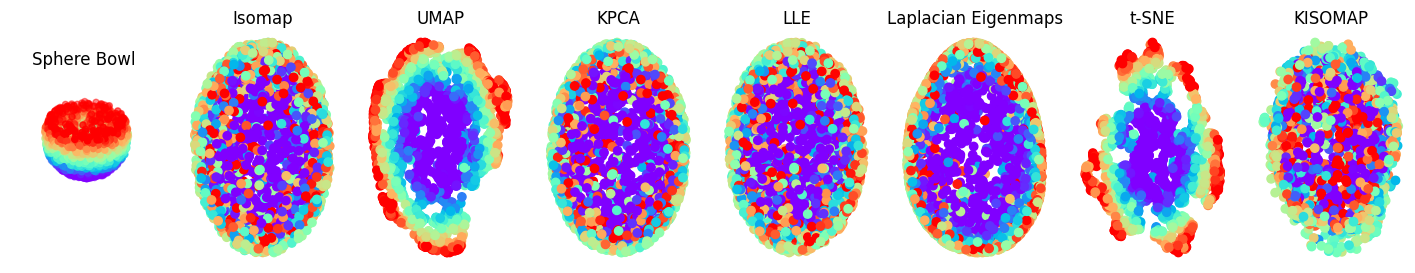

In [64]:
color = [cm.rainbow(valor) for valor in X.T[2]+0.6]
compare_and_plot_surface_reduction(X,color,'Sphere Bowl')

# Linked Torus

In [78]:
# Parameters
u = np.linspace(0, 2*np.pi, 26)
v = np.linspace(0, 2*np.pi, 26)
U, V = np.meshgrid(u, v)

R = 5
r = 1

# Torus Surface equation
x = (R+r*np.cos(V))*np.cos(U)
y = (R+r*np.cos(V))*np.sin(U)-5
z = r*np.sin(V)


x_1 = r*np.sin(V) 
y_1 = (R+r*np.cos(V))*np.sin(U) 
z_1 = (R+r*np.cos(V))*np.cos(U)

# Add Gaussian noise with 0.3 standard deviation
np.random.seed(127)
noise_matrix_1 = np.random.normal(0, 0.3, (len(z.flatten()), 3))
data_matrix_1 = np.column_stack((x.flatten(), y.flatten(), z.flatten())) + noise_matrix_1

noise_matrix_2 = np.random.normal(0, 0.3, (len(z_1.flatten()), 3))
data_matrix_2 = np.column_stack((x_1.flatten(), y_1.flatten(), z_1.flatten())) + noise_matrix_2

result_matrix = np.vstack([np.column_stack((data_matrix_1, np.full(len(z.flatten()), 0.3))), 
                          np.column_stack((data_matrix_2, np.full(len(z_1.flatten()), 0.7)))]).astype('float64')

Isomap
UMAP
KPCA
LLE
Laplacian Eigenmaps
t-SNE
KISOMAP


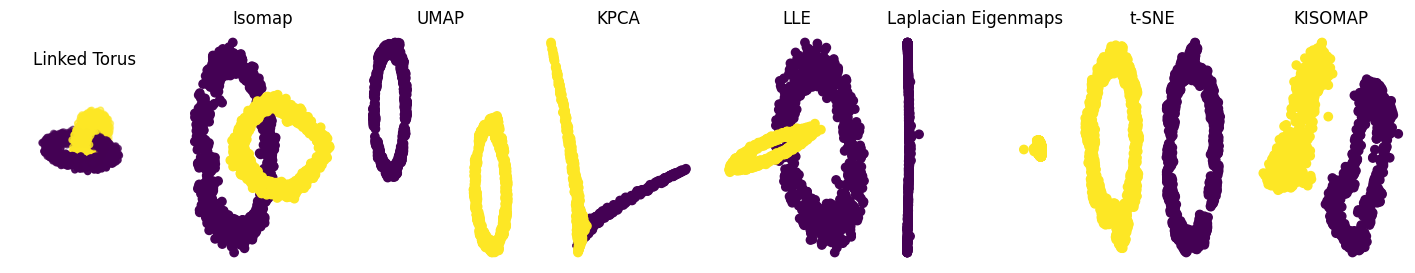

In [79]:
color = result_matrix[:,3]
compare_and_plot_surface_reduction(result_matrix[:,:3],color,'Linked Torus')

# 3D Plots

In [ ]:
import matplotlib.colors as mcolors

'''
Produces scatter plots of the 2D mappings
'''
def PlotaDados3D(dados, labels, metodo):
    # Number of classes
    nclass = len(np.unique(labels))
    
    # Converts list to an array (if needed)
    rotulos = np.array(labels)
    
    # Define colors according to the number of classes
    if nclass > 11:
        cores = list(mcolors.CSS4_COLORS.keys())
        #np.random.shuffle(cores)
    else:
        cores = [
            'blue', 'red', 'cyan', 'black', 'orange', 'magenta', 'green',
            'darkkhaki', 'brown', 'purple', 'salmon'
        ]
    
    # Create figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    for i in range(nclass):
        indices = np.where(rotulos == i)[0]
        cor = cores[i % len(cores)]  # Ensures no index out of range
        ax.scatter(dados[indices, 0], dados[indices, 1], dados[indices, 2], c=cor, label=f'Class {i}', marker='*')
    
    # Add title and legend
    plt.title(f'{metodo} clusters')
    
    # Save figure to file
    nome_arquivo = f'images/{metodo}_gmm.png'
    plt.savefig(nome_arquivo)
    plt.show()

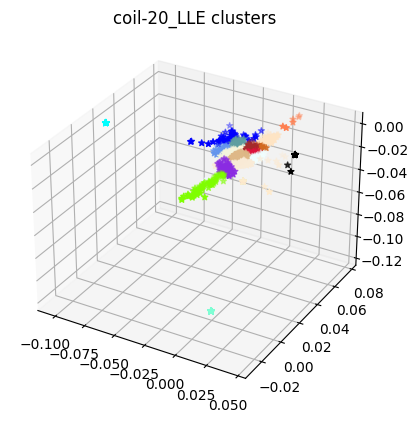

In [ ]:
PlotaDados3D(LLE_data.T,L_LLE['GMM']['labels'],'coil-20_LLE')